# BUILDING THE TRAINED MODEL

DATA PREPROCESSING

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('upi_fraud_dataset.csv', index_col = 0)

In [3]:
dataset.head()

,trans_hour,trans_day,trans_month,trans_year,category,upi_number,age,trans_amount,state,zip,fraud_risk
Id,,,,,,,,,,,
0,0,1,1,2022,12,9957000001,54,66.21,22,49879,0
1,1,1,1,2022,3,9957000002,15,55.81,14,62668,0
2,3,1,1,2022,8,9957000003,60,8.68,4,96037,0
3,6,1,1,2022,4,9957000004,44,89.52,40,29911,0
4,6,1,1,2022,0,9957000005,72,1.90,38,16421,0


In [4]:
import numpy as np

In [7]:
x = dataset.iloc[ : , : 10].values
y = dataset.iloc[ : , 10].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [10]:
x_train.shape

(2266, 10)

In [11]:
x_test.shape

(400, 10)

In [12]:
fraud = np.count_nonzero(y_train == 1)
valid = np.count_nonzero(y_train == 0)

In [13]:
print('Fraud cases in training data =', fraud)
print('Valid cases in training data =', valid)

Fraud cases in training data = 1348
Valid cases in training data = 918


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
x_train[ : 5]

array([[ 1.11287494,  0.23492331, -0.89608107,  0.        ,  0.0602433 ,
         0.707473  ,  0.83994401, -0.84340161, -0.45791225, -1.64639185],
       [-1.1894848 , -0.92886509,  0.66178275,  0.        , -1.24483613,
        -0.37260519, -0.27301162, -0.83469894,  1.03866827, -0.4058421 ],
       [ 1.11287494, -1.02584746,  2.53121934,  0.        ,  0.32125918,
        -0.37260586,  1.63491233,  1.40609705, -0.31538077,  0.32896382],
       [-1.1894848 ,  0.91379987, -0.89608107,  0.        , -1.24483613,
        -1.12148712, -0.3790074 , -0.72010938, -0.24411503,  0.5966091 ],
       [ 1.11287494,  0.42888804, -0.89608107,  0.        , -1.76686789,
        -1.12148724, -0.8029905 ,  0.14610555,  1.18119975,  1.37176053]])

In [17]:
x_test[ : 5]

array([[ 0.99775696, -1.02584746,  0.66178275,  0.        , -1.50585201,
        -0.37260604, -0.8029905 , -0.55231661, -0.24411503,  0.60587057],
       [-1.30460278,  1.6896588 , -0.89608107,  0.        , -0.72280436,
        -0.93868951,  0.09797359, -0.10066076, -1.66942982,  1.78976412],
       [-1.07436681,  0.33190567, -0.27293554,  0.        , -1.24483613,
        -0.37260571, -0.96198416, -0.63173177,  0.46854236, -1.33247671],
       [ 0.53728501, -1.21981219,  0.66178275,  0.        ,  1.10430683,
         1.88288211,  0.94593979,  1.36440214, -0.24411503,  0.62521842],
       [ 0.07681306, -1.02584746, -0.27293554,  0.        , -0.20077259,
        -0.37260614, -0.22001374, -0.63409578, -0.67170947,  0.8568677 ]])

LOGISTIC REGRESSION (LR)

In [18]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [19]:
y_pred = LR_model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
acc_lr = accuracy_score(y_test, y_pred)

In [22]:
print(acc_lr)

0.8025


K-NEAREST NEIGHBORS (KNN)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred = KNN_model.predict(x_test)

In [25]:
acc_knn = accuracy_score(y_test, y_pred)

In [26]:
print(acc_knn)

0.8375


SUPPORT VECTOR MACHINE (SVM)

In [27]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', random_state = 0)
SVM_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [28]:
y_pred = SVM_model.predict(x_test)

In [29]:
acc_svm = accuracy_score(y_test, y_pred)

In [30]:
print(acc_svm)

0.815


NAIVE BAYES (NB)

In [31]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [32]:
y_pred = NB_model.predict(x_test)

In [33]:
acc_nb = accuracy_score(y_test, y_pred)

In [34]:
print(acc_nb)

0.8125


DECISION TREE (DT)

In [35]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
y_pred = DT_model.predict(x_test)

In [37]:
acc_dt = accuracy_score(y_test, y_pred)

In [38]:
print(acc_dt)

0.9475


RANDOM FOREST (RF)

In [39]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
y_pred = RF_model.predict(x_test)

In [41]:
acc_rf = accuracy_score(y_test, y_pred)

In [42]:
print(acc_rf)

0.9525


CONVOLUTIONAL NEURAL NETWORK (CNN)

In [44]:
pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.1.24-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.8/390.3 MB 10.0 MB/s eta 0:00:39
   -----------------

In [45]:
import tensorflow as tf

In [46]:
CNN_model = tf.keras.models.Sequential()

In [47]:
CNN_model.add(tf.keras.layers.Dense(64, input_dim = 10, activation = 'relu'))
CNN_model.add(tf.keras.layers.Dense(128, activation = 'relu'))
CNN_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

C:\Users\Subbu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
CNN_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
CNN_model.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6633 - loss: 0.5965
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8186 - loss: 0.4092
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8199 - loss: 0.3697
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8484 - loss: 0.3288
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8630 - loss: 0.3280
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8592 - loss: 0.2999
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8673 - loss: 0.2948
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8633 - loss: 0.3111
Epoch 9/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8767 - loss: 0.2855
Epoch 10/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8593 - loss: 0.3095
Epoch 11/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8673 - loss: 0.2906
Epoch 12/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy:

In [50]:
loss, acc_cnn = CNN_model.evaluate(x_train, y_train, verbose = 0)

In [51]:
print(acc_cnn)

1.0


In [52]:
y_pred = CNN_model.predict(x_test)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


ACCURACY COMPARISON OF ALL THE MODELS

In [53]:
scores = [acc_lr * 100,
          acc_knn * 100,
          acc_svm * 100,
          acc_nb * 100,
          acc_dt * 100,
          acc_rf * 100,
          acc_cnn * 100]

In [54]:
names = ["Logistic Regression",
        "K-Nearest Neighbors",
        "Support Vector Machine",
        "Naive Bayes",
        "Decision Tree",
        "Random Forest",
        "Convolutional Neural Network"]

In [55]:
df = pd.DataFrame()
df['Algorithm Name'] = names
df['Accuracy Score (%)'] = scores
df = df.sort_values('Accuracy Score (%)', ascending = False)

In [56]:
df

,Algorithm Name,Accuracy Score (%)
6,Convolutional Neural Network,100.00
5,Random Forest,95.25
4,Decision Tree,94.75
1,K-Nearest Neighbors,83.75
2,Support Vector Machine,81.50
3,Naive Bayes,81.25
0,Logistic Regression,80.25


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

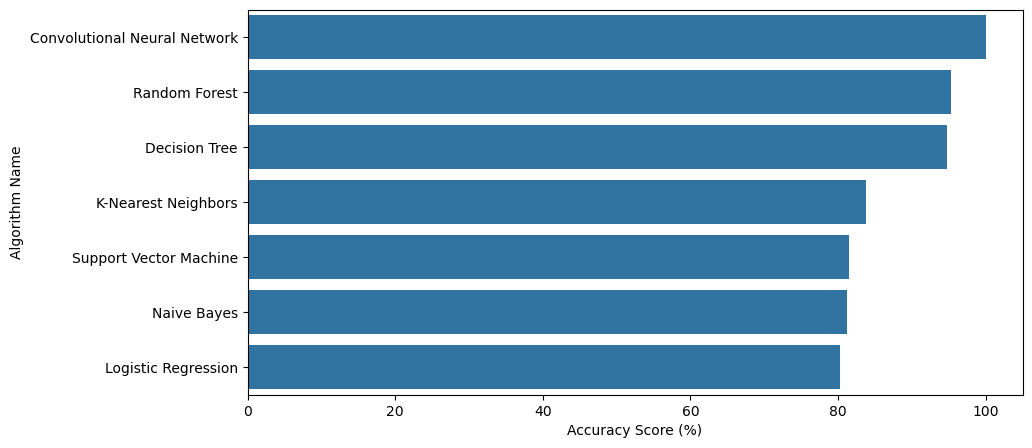

In [58]:
fig = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = "Accuracy Score (%)", y = "Algorithm Name", data = df)

SAVING THE BEST TRAINED MODEL

In [59]:
import os.path

In [61]:
if os.path.isfile('project_model1.h5') is False:
    CNN_model.save('project_model1.h5')

In [ ]:
pip install tensorflow==2.10
